In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import time
import dateutil
import numpy as np
from scipy.interpolate import interp1d


import sys
sys.path.append('../')
import src.io as sio

In [12]:
import matplotlib
print(matplotlib.matplotlib_fname())

C:\Users\pinto\AppData\Local\Continuum\anaconda3\envs\analysis\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [2]:
FOLDER_PATH = sio.get_qudiamond_folderpath(os.path.join("20210816_RTStageTesting_MW_MembraneSample", "ZVL_continuous_testing"))
FOLDER_PATH2 = sio.get_qudiamond_folderpath("20190802_MW_Transmission")

src.io :: INFO :: qudiamond folderpath is \\kernix\qudiamond\Data\20210816_RTStageTesting_MW_MembraneSample\ZVL_continuous_testing\
src.io :: INFO :: qudiamond folderpath is \\kernix\qudiamond\Data\20190802_MW_Transmission\


In [7]:
files = os.listdir(FOLDER_PATH)

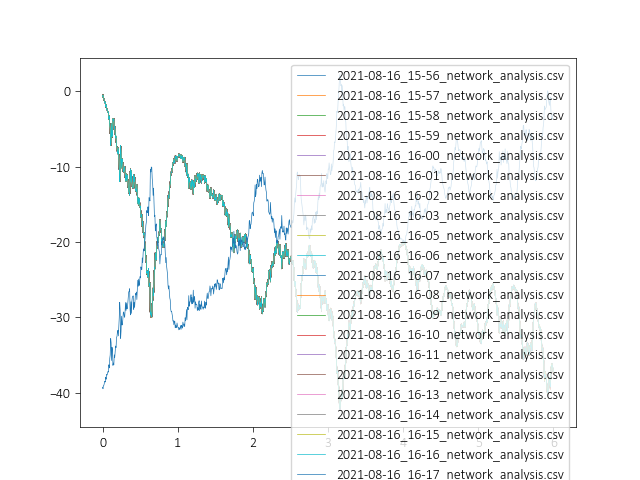

In [8]:
fig, ax = plt.subplots()

for file in files:
    df = pd.read_csv(os.path.join(FOLDER_PATH, file))
    ax.plot(df["Frequency"] / 1e9, df["Power"], linewidth=0.5, label=file)

ax.legend()

NameError: name 'file1' is not defined

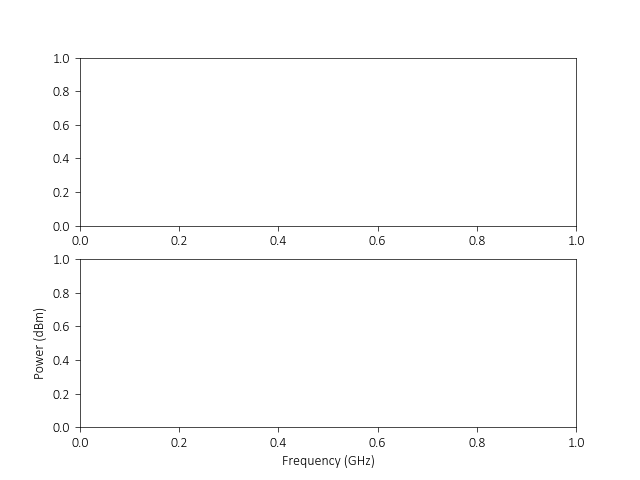

In [3]:
%matplotlib widget
fig, (ax1, ax2) = plt.subplots(nrows=2)

ax2.set_ylabel("Power (dBm)")
ax2.set_xlabel("Frequency (GHz)")


df = pd.read_csv(os.path.join(FOLDER_PATH, file1))
ax1.plot(df["Frequency"] / 1e9, df["Power"], linewidth=0.5, label="Transmission")


for file1, file2 in zip(os.listdir(FOLDER_PATH), os.listdir(FOLDER_PATH2)):
    if file1.endswith(".csv"):
        df = pd.read_csv(os.path.join(FOLDER_PATH, file1))
        
        print(np.max(-df["Power"]) - 30)
        power_correction = -df["Power"] - (np.max(-df["Power"]) - 30)
        
        f = interp1d(df["Frequency"], power_correction)
        
        #ax.plot(df["Frequency"] / 1e9, f(df["Frequency"]), linewidth=0.5, label="Interpolant")
        ax.plot(df["Frequency"] / 1e9, df["Power"], linewidth=0.5, label="Transmission")
        #ax.plot(df["Frequency"] / 1e9, power_correction, "--", linewidth=0.1, label="Corrected power")
        #ax.plot(df["Frequency"] / 1e9, df["Power"]+power_correction, linewidth=0.5, label="Output")

    if file2.endswith(".csv"):
        df = pd.read_csv(os.path.join(FOLDER_PATH2, file2), skiprows=2)[35:]
        ax.plot(df["freq[Hz]"] / 1e9, df["Trc1_S21[dB]"], linewidth=0.5, label=f"{file2}")
        
zfs = 2.8
mw_r = 2.8 * 0.4
ax.axvline(zfs)
#ax.set_xlim([zfs - mw_r, zfs + mw_r])
fig.legend()

11.634694410000002
11.799130769999998
11.635232639999998
11.795340410000001
11.559955700000003
11.774791950000001
11.708236820000003
11.672793069999997
11.695760409999998
11.767223260000002
11.7882587
11.791678959999999
11.840889400000002
11.539533730000002
11.646882779999999
11.54167811
11.81547947


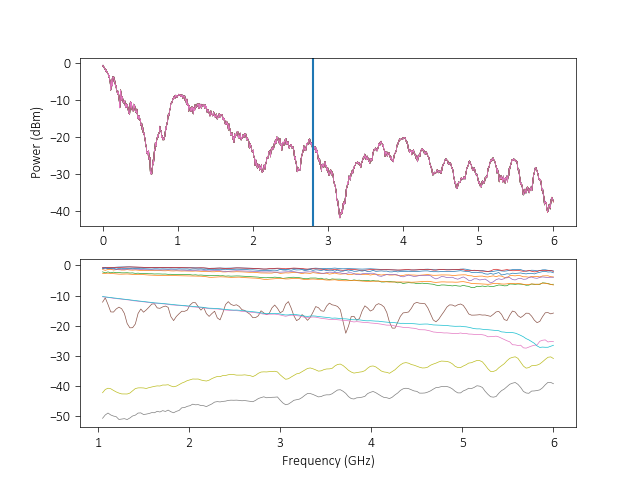

In [9]:
%matplotlib widget
fig, (ax1, ax2) = plt.subplots(nrows=2)

ax1.set_ylabel("Power (dBm)")
ax2.set_xlabel("Frequency (GHz)")

for file1, file2 in zip(os.listdir(FOLDER_PATH), os.listdir(FOLDER_PATH2)):
    if file1.endswith(".csv"):
        df = pd.read_csv(os.path.join(FOLDER_PATH, file1))
        
        print(np.max(-df["Power"]) - 30)
        power_correction = -df["Power"] - (np.max(-df["Power"]) - 30)
        
        f = interp1d(df["Frequency"], power_correction)
        
        #ax.plot(df["Frequency"] / 1e9, f(df["Frequency"]), linewidth=0.5, label="Interpolant")
        ax1.plot(df["Frequency"] / 1e9, df["Power"], linewidth=0.5, label="Transmission")
        #ax.plot(df["Frequency"] / 1e9, power_correction, "--", linewidth=0.1, label="Corrected power")
        #ax.plot(df["Frequency"] / 1e9, df["Power"]+power_correction, linewidth=0.5, label="Output")

    if file2.endswith(".csv"):
        df = pd.read_csv(os.path.join(FOLDER_PATH2, file2), skiprows=2)[35:]
        ax2.plot(df["freq[Hz]"] / 1e9, df["Trc1_S21[dB]"], linewidth=0.5, label=f"{file2}")
        
zfs = 2.8
mw_r = 2.8 * 0.4
ax1.axvline(zfs)
#ax.set_xlim([zfs - mw_r, zfs + mw_r])
#fig.legend()

In [ ]:
df["Power"] = -df["Power"] - (np.max(-df["Power"]) - 30)

In [ ]:
df.to_csv(os.path.join(FOLDER_PATH, "Corrected_power.csv"), index=False)

In [ ]:
freq = np.arange(zfs-mw_r, zfs+mw_r, 0.01)
power = f(freq)

fig, ax = plt.subplots()
ax.plot(freq, power)
ax.plot(df["Frequency"] / 1e9, df["Power"])
#ax.set_xlim([zfs - mw_r, zfs + mw_r])

In [ ]:
np.mean(power)

In [ ]:
import csv